In [1]:
from utils import CustomDataset
from torch.utils.data import DataLoader
from Network.Resnet import ResNet
from Network.Mobilenet import MobileNet
from utils.MNISTTrain import train
from torch.utils.data import random_split
from torchvision import datasets
from torchvision.transforms import Compose, ToTensor, Normalize
import torch
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import colors as mcolors

/home/taehwan/MICCAI/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/taehwan/MICCAI/.venv/lib/python3.12/site-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (4.2.8) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [2]:
# central = pd.read_csv("./Result/central/mnist/result.csv")
fedavg = pd.read_csv("Result/fedavg/FedAvg_mnist.csv")
fedprox = pd.read_csv("Result/fedprox/FedProx_mnist.csv")
fedref = pd.read_csv("Result/fedref/FedRef_mnist_lda0.1.csv")
fedref09 = pd.read_csv("Result/fedref/FedRef_mnist.csv")

In [3]:
# DEVICE= torch.device("cuda" if torch.cuda.is_available() else "cpu")
# trainset = datasets.MNIST("./Data", True, Compose([ToTensor(), Normalize((0.5), (0.5))]), None, True)
# testset = datasets.MNIST("./Data", False, Compose([ToTensor(), Normalize((0.5), (0.5))]), None, True)
# loader = DataLoader(trainset, 128, shuffle=True, collate_fn=lambda x:x)
# tloader = DataLoader(testset, 128 , shuffle=True, collate_fn=lambda x:x)
# loss = torch.nn.BCEWithLogitsLoss().to(DEVICE)


In [4]:
# net = MobileNet(outdim=10)
# optim = torch.optim.SGD(net.parameters(), lr=4e-3)

In [5]:
# history=train(net.to(DEVICE), loader, tloader , 5, loss, optim, DEVICE, None)
# pd.DataFrame(history).to_csv("./Result/central/mnist/result.csv", index=False)

In [6]:
def ploting(fedavg, fedprox, fedref, title="MNIST Classification", zoom_min = 20, zoom_max=25):
    # 예시 데이터
    tableau_colors = list(mcolors.TABLEAU_COLORS.values())
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(fedavg["loss"], marker=".", linestyle="--",label="fedavg", color=tableau_colors[0])
    ax.plot(fedprox["loss"], marker=".", linestyle="--" ,label="fedprox", color=tableau_colors[1])
    for i,l in enumerate(fedref):
        ax.plot(l["loss"], marker=".", label=l["label"], color=tableau_colors[i+2], linestyle="--")

    # 메인 축 설정
    ax.set_title(title)
    ax.set_xlabel("Round")
    ax.set_ylabel("Loss")
    ax.legend()
    # 🔍 확대 구간 설정 (마지막 x값 근처, 예: x > 90)
    x_zoom_min = zoom_min
    x_zoom_max = zoom_max

    # inset 축 생성
    axins = inset_axes(ax, width="30%", height="40%", loc='upper center')
    axins.plot(fedavg["loss"], color =tableau_colors[0], label = "fedavg")
    axins.plot(fedprox["loss"], color =tableau_colors[1], label = "fedprox")
    for i,l in enumerate(fedref):
        axins.plot(l["loss"], label=l["label"], color=tableau_colors[i+2])
        
    alp = []
    alp = fedavg["loss"][zoom_min:zoom_max+1].to_list() + fedprox["loss"][zoom_min:zoom_max+1].to_list()
    for l in fedref:
        alp = alp + l["loss"][zoom_min:zoom_max+1].to_list()
    
    axins.set_xlim(x_zoom_min, x_zoom_max)
    # 확대된 y축 범위도 지정하면 보기 쉬움
    # y_zoom = y[(x >= x_zoom_min) & (x <= x_zoom_max)]
    axins.set_ylim(min(alp), max(alp))

    # 확대된 영역 표시선 연결
    ax.indicate_inset_zoom(axins)
    ax.legend()
    
    ax.set_ylim(bottom=fedref[0]["loss"][len(fedref[0]["loss"])-1],top=fedavg["loss"][1])
    
    fig.show()
    

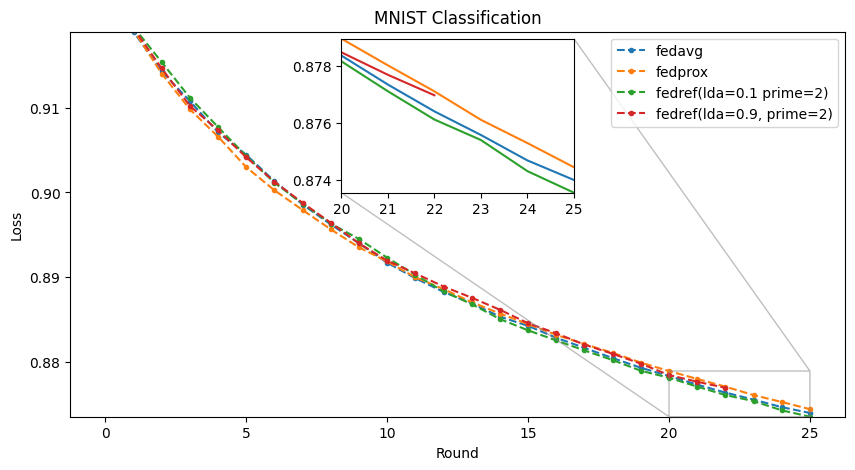

In [7]:
ploting(fedavg, fedprox, ({"loss":fedref["loss"], "label":"fedref(lda=0.1 prime=2)"}, 
                          {"loss":fedref09["loss"], "label": "fedref(lda=0.9, prime=2)"}))

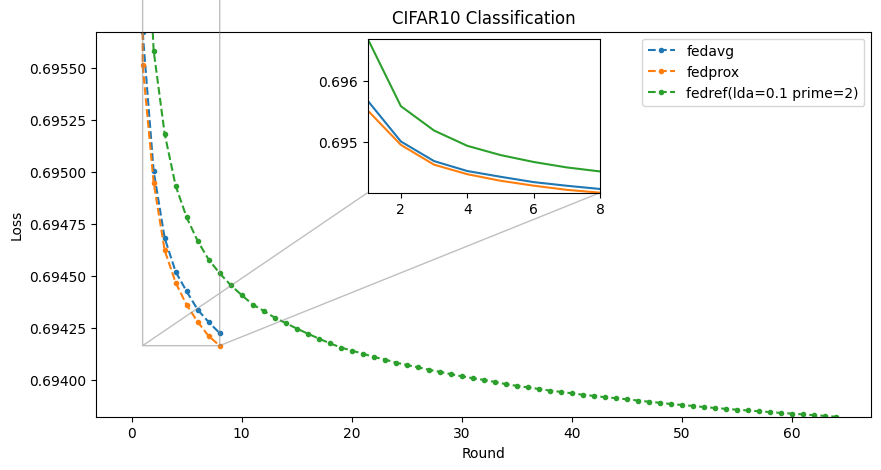

In [8]:
fedavg2 = pd.read_csv("Result/fedavg/FedAvg_cifar10.csv")
fedprox2 = pd.read_csv("Result/fedprox/FedProx_cifar10.csv")
fedref2 = pd.read_csv("Result/fedref/FedRef_cifar10.csv")
ploting(fedavg2, fedprox2, ({"loss":fedref2["loss"], "label":"fedref(lda=0.1 prime=2)"},), zoom_min=1, zoom_max=8, title="CIFAR10 Classification")